In [1]:
from pathlib import Path

import pyparsing as pp

mess_inp_file = Path("01_1-2_mess.inp")
spc_file = Path("species.csv")

In [2]:
from importlib import reload

from mess_io_proto import surface

reload(surface)

surf = surface.from_mess(mess_inp_file, spc_inp=spc_file)
surf

Surface(wells=[UnimolWell(energy=0.0, fake=False, id=0, type='unimol', name='S(722)r0'), NMolWell(energy=2.87, fake=True, id=1, type='nmol', names=['C5H8(522)', 'HO2(8)'], interacting=True), NMolWell(energy=-20.95, fake=True, id=2, type='nmol', names=['C5H8O(825)rs', 'OH(4)'], interacting=True), NMolWell(energy=5.87, fake=False, id=3, type='nmol', names=['C5H8(522)', 'HO2(8)'], interacting=False), NMolWell(energy=-17.95, fake=False, id=4, type='nmol', names=['C5H8O(825)rs', 'OH(4)'], interacting=False)], barriers=[Barrier(energy=5.87, fake=True, well_ids=(1, 3), name='FakeB-C5H8(522)+HO2(8)', barrierless=True), Barrier(energy=15.29, fake=False, well_ids=(0, 1), name='ts_1_1', barrierless=False), Barrier(energy=-17.95, fake=True, well_ids=(2, 4), name='FakeB-C5H8O(825)rs+OH(4)', barrierless=True), Barrier(energy=10.94, fake=False, well_ids=(0, 2), name='ts_1_2', barrierless=False)], amchi_mapping={'OH(4)': 'AMChI=1/HO/h1H', 'HO2(8)': 'AMChI=1/HO2/c1-2/h2H', 'C5H8(522)': 'AMChI=1/C5H8/c1

In [3]:
map_dct = surface.fake_well_mapping(surf)
surf = surface.without_fake_wells(surf)
surface.display_network(surf)
max_path = surface.longest_path(surf)

<Figure size 1000x500 with 0 Axes>

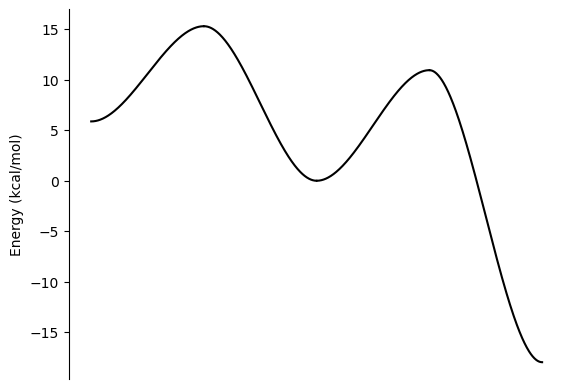

In [5]:
from importlib import reload

from matplotlib import pyplot

reload(surface)


size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()

fig = surface.plot_paths(surf, paths=[max_path], fig=fig)